# 1. 데이터 다운로드

In [ ]:
!mkdir -p ../data/moa-work

In [1]:
%cd ../data/moa-work

/var2/Works/junhyeong/bioinfo1_project/my_own_analysis/data/moa-work


In [ ]:
%cp -r ../moa-eclip/* ./

In [ ]:
!gzip -d *.gz

In [ ]:
!wget https://www.arabidopsis.org/api/download-files/download?filePath=Sequences/Assemblies/TAIR9_chr_all.fas -O ../moa-genomic-fasta/at.genome.fasta

In [58]:
!wget https://www.arabidopsis.org/api/download-files/download?filePath=Genes/TAIR9_genome_release/tair9_gff3/TAIR9_GFF3_genes.gff -O ../moa-genomic-fasta/at.gff3

--2025-06-09 08:34:56--  https://www.arabidopsis.org/api/download-files/download?filePath=Genes/TAIR9_genome_release/tair9_gff3/TAIR9_GFF3_genes.gff
Resolving www.arabidopsis.org (www.arabidopsis.org)... 15.197.242.219, 76.223.67.159
Connecting to www.arabidopsis.org (www.arabidopsis.org)|15.197.242.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [binary/octet-stream]
Saving to: ‘../moa-genomic-fasta/at.gff3’

../moa-genomic-fast     [             <=>    ]  38.38M  10.4MB/s    in 4.2s    

2025-06-09 08:35:01 (9.05 MB/s) - ‘../moa-genomic-fasta/at.gff3’ saved [40240838]



# 2. READ filtering

In [34]:
!conda run -n seq-env fastp --help

usage: fastp [options] ... 
options:
  -i, --in1                            read1 input file name (string [=])
  -o, --out1                           read1 output file name (string [=])
  -I, --in2                            read2 input file name (string [=])
  -O, --out2                           read2 output file name (string [=])
      --unpaired1                      for PE input, if read1 passed QC but read2 not, it will be written to unpaired1. Default is to discard it. (string [=])
      --unpaired2                      for PE input, if read2 passed QC but read1 not, it will be written to unpaired2. If --unpaired2 is same as --unpaired1 (default mode), both unpaired reads will be written to this same file. (string [=])
      --overlapped_out                 for each read pair, output the overlapped region if it has no any mismatched base. (string [=])
      --failed_out                     specify the file to store reads that cannot pass the filters. (string [=])
  -m, --merge  

In [35]:
!ls -alh

total 139G
drwxrwxr-x. 2 junhyeong junhyeong 4.0K Jun  7 16:17 .
drwxrwxr-x. 5 junhyeong junhyeong 4.0K Jun  7 15:19 ..
-rw-rw-r--. 1 junhyeong junhyeong 473K Jun  7 15:24 fastp.html
-rw-rw-r--. 1 junhyeong junhyeong 129K Jun  7 15:24 fastp.json
-rw-rw-r--. 1 junhyeong junhyeong 9.9G Jun  5 11:08 GFP-AtSKRP-eCLIP_1_f1.fastq
-rw-rw-r--. 1 junhyeong junhyeong 6.3G Jun  7 15:18 GFP-AtSKRP-eCLIP_1_f1.parse.fastq
-rw-rw-r--. 1 junhyeong junhyeong 9.9G Jun  5 11:08 GFP-AtSKRP-eCLIP_1_r2.fastq
-rw-rw-r--. 1 junhyeong junhyeong 6.3G Jun  7 15:18 GFP-AtSKRP-eCLIP_1_r2.parse.fastq
-rw-rw-r--. 1 junhyeong junhyeong  14G Jun  7 15:57 GFP-AtSKRP-eCLIP_1.sam
-rw-rw-r--. 1 junhyeong junhyeong 9.3G Jun  5 11:08 GFP-AtSKRP-eCLIP_2_f1.fastq
-rw-rw-r--. 1 junhyeong junhyeong 6.0G Jun  7 15:22 GFP-AtSKRP-eCLIP_2_f1.parse.fastq
-rw-rw-r--. 1 junhyeong junhyeong 9.3G Jun  5 11:08 GFP-AtSKRP-eCLIP_2_r2.fastq
-rw-rw-r--. 1 junhyeong junhyeong 6.0G Jun  7 15:22 GFP-AtSKRP-eCLIP_2_r2.parse.fastq
-rw-rw-r--. 1 j

In [144]:
!conda run -n seq-env fastp -i GFP-AtSKRP-eCLIP_1_f1.fastq -I GFP-AtSKRP-eCLIP_1_r2.fastq -o GFP-AtSKRP-eCLIP_1_f1.parse.fastq -O GFP-AtSKRP-eCLIP_1_r2.parse.fastq -w 16 --detect_adapter_for_pe --umi --umi_loc=read2 --umi_len=10 --umi_prefix="UMI"

Detecting adapter sequence for read1...
>Illumina TruSeq Adapter Read 1
AGATCGGAAGAGCACACGTCTGAACTCCAGTCA

Detecting adapter sequence for read2...
>Illumina TruSeq Adapter Read 2
AGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT

Read1 before filtering:
total reads: 29076664
total bases: 4361499600
Q20 bases: 3993291408(91.5578%)
Q30 bases: 3709439773(85.0496%)

Read2 before filtering:
total reads: 29076664
total bases: 4361499600
Q20 bases: 4062245960(93.1387%)
Q30 bases: 3906987664(89.579%)

Read1 after filtering:
total reads: 28588251
total bases: 2133958767
Q20 bases: 2085671774(97.7372%)
Q30 bases: 2003364621(93.8802%)

Read2 after filtering:
total reads: 28588251
total bases: 2093414303
Q20 bases: 2056102590(98.2177%)
Q30 bases: 2008200596(95.9294%)

Filtering result:
reads passed filter: 57176502
reads failed due to low quality: 678058
reads failed due to too many N: 2266
reads failed due to too short: 296502
reads with adapter trimmed: 54445279
bases trimmed due to adapters: 4116640294

Duplic

In [145]:
!conda run -n seq-env fastp -i GFP-AtSKRP-eCLIP_2_f1.fastq -I GFP-AtSKRP-eCLIP_2_r2.fastq -o GFP-AtSKRP-eCLIP_2_f1.parse.fastq -O GFP-AtSKRP-eCLIP_2_r2.parse.fastq -w 16 --detect_adapter_for_pe --umi --umi_loc=read2 --umi_len=10 --umi_prefix="UMI"

Detecting adapter sequence for read1...
>Illumina TruSeq Adapter Read 1
AGATCGGAAGAGCACACGTCTGAACTCCAGTCA

Detecting adapter sequence for read2...
>Illumina TruSeq Adapter Read 2
AGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT

Read1 before filtering:
total reads: 27530414
total bases: 4129562100
Q20 bases: 3770818643(91.3128%)
Q30 bases: 3503512484(84.8398%)

Read2 before filtering:
total reads: 27530414
total bases: 4129562100
Q20 bases: 3842867199(93.0575%)
Q30 bases: 3692379472(89.4133%)

Read1 after filtering:
total reads: 27067010
total bases: 2060703685
Q20 bases: 2014323069(97.7493%)
Q30 bases: 1933249030(93.815%)

Read2 after filtering:
total reads: 27067010
total bases: 2015416579
Q20 bases: 1983022930(98.3927%)
Q30 bases: 1936437231(96.0812%)

Filtering result:
reads passed filter: 54134020
reads failed due to low quality: 724188
reads failed due to too many N: 2862
reads failed due to too short: 199758
reads with adapter trimmed: 50828646
bases trimmed due to adapters: 3813602511

Duplic

In [146]:
!conda run -n seq-env fastp -i GFP-AtSKRP-eCLIP_3_f1.fastq -I GFP-AtSKRP-eCLIP_3_r2.fastq -o GFP-AtSKRP-eCLIP_3_f1.parse.fastq -O GFP-AtSKRP-eCLIP_3_r2.parse.fastq -w 16 --detect_adapter_for_pe --umi --umi_loc=read2 --umi_len=10 --umi_prefix="UMI"

Detecting adapter sequence for read1...
>Illumina TruSeq Adapter Read 1
AGATCGGAAGAGCACACGTCTGAACTCCAGTCA

Detecting adapter sequence for read2...
>Illumina TruSeq Adapter Read 2
AGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT

Read1 before filtering:
total reads: 25195917
total bases: 3779387550
Q20 bases: 3500819460(92.6293%)
Q30 bases: 3305622101(87.4645%)

Read2 before filtering:
total reads: 25195917
total bases: 3779387550
Q20 bases: 3541261883(93.6994%)
Q30 bases: 3394204057(89.8083%)

Read1 after filtering:
total reads: 24759523
total bases: 2025076497
Q20 bases: 1992303829(98.3817%)
Q30 bases: 1926274570(95.1211%)

Read2 after filtering:
total reads: 24759523
total bases: 1978462172
Q20 bases: 1952101091(98.6676%)
Q30 bases: 1904239238(96.2485%)

Filtering result:
reads passed filter: 49519046
reads failed due to low quality: 581284
reads failed due to too many N: 916
reads failed due to too short: 290588
reads with adapter trimmed: 44053584
bases trimmed due to adapters: 3218950110

Duplic

In [147]:
!conda run -n seq-env fastp -i GFP-eCLIP_f1.fastq -I GFP-eCLIP_r2.fastq -o GFP-eCLIP_f1.parse.fastq -O GFP-eCLIP_r2.parse.fastq -w 16 --detect_adapter_for_pe --umi --umi_loc=read2 --umi_len=10 --umi_prefix="UMI"

Detecting adapter sequence for read1...
>Illumina TruSeq Adapter Read 1
AGATCGGAAGAGCACACGTCTGAACTCCAGTCA

Detecting adapter sequence for read2...
No adapter detected for read2

Read1 before filtering:
total reads: 5452540
total bases: 817881000
Q20 bases: 585191588(71.5497%)
Q30 bases: 493086622(60.2883%)

Read2 before filtering:
total reads: 5452540
total bases: 817881000
Q20 bases: 584148625(71.4222%)
Q30 bases: 509777576(62.3291%)

Read1 after filtering:
total reads: 1951700
total bases: 212035584
Q20 bases: 189770388(89.4993%)
Q30 bases: 163228260(76.9815%)

Read2 after filtering:
total reads: 1951700
total bases: 218845591
Q20 bases: 181272730(82.8313%)
Q30 bases: 153756776(70.2581%)

Filtering result:
reads passed filter: 3903400
reads failed due to low quality: 3213754
reads failed due to too many N: 30
reads failed due to too short: 3787896
reads with adapter trimmed: 5075886
bases trimmed due to adapters: 615137148

Duplication rate: 1.11482%

Insert size peak (evaluated by p

In [91]:
# 2-2. PCR deduplicate

# 3. READ MAPPING

In [148]:
!ls -alh

total 141G
drwxrwxr-x. 3 junhyeong junhyeong 4.0K Jun 11 14:54 .
drwxrwxr-x. 5 junhyeong junhyeong 4.0K Jun  7 15:19 ..
-rw-rw-r--. 1 junhyeong junhyeong 2.4M Jun 11 13:45 at-plusexon.bed
-rw-r--r--. 1 junhyeong junhyeong  40K Jun 11 14:16 .at-plusexon.bed.swp
-rw-rw-r--. 1 junhyeong junhyeong 3.7M Jun 11 13:45 at-plusexon.gff3
-rw-r--r--. 1 junhyeong junhyeong  52K Jun 11 14:54 .at-plusexon.gff3.swp
-rw-rw-r--. 1 junhyeong junhyeong 2.4M Jun 11 14:00 at-plusexon.slop.bed
-rw-r--r--. 1 junhyeong junhyeong  40K Jun 11 14:16 .at-plusexon.slop.bed.swp
-rw-rw-r--. 1 junhyeong junhyeong 470K Jun 11 15:12 fastp.html
-rw-rw-r--. 1 junhyeong junhyeong 128K Jun 11 15:12 fastp.json
-rw-rw-r--. 1 junhyeong junhyeong 903M Jun  9 15:32 filtered-GFP-AtSKRP-eCLIP_1.bam
-rw-rw-r--. 1 junhyeong junhyeong 928M Jun  9 15:42 filtered-GFP-AtSKRP-eCLIP_2.bam
-rw-rw-r--. 1 junhyeong junhyeong  36M Jun  9 15:42 filtered-GFP-AtSKRP-eCLIP_3.bam
-rw-rw-r--. 1 junhyeong junhyeong 179K Jun  9 15:42 filtered-GFP-eC

In [149]:
!ls -alh ../moa-genomic-fasta/

total 332M
drwxrwxr-x. 2 junhyeong junhyeong 4.0K Jun 11 13:55 .
drwxrwxr-x. 5 junhyeong junhyeong 4.0K Jun  7 15:19 ..
-rw-rw-r--. 1 junhyeong junhyeong 116M Jun  5 11:24 at.genome.fasta
-rw-rw-r--. 1 junhyeong junhyeong  42M Jun  7 15:33 at.genome.index.1.ht2
-rw-rw-r--. 1 junhyeong junhyeong  29M Jun  7 15:33 at.genome.index.2.ht2
-rw-rw-r--. 1 junhyeong junhyeong 3.2K Jun  7 15:32 at.genome.index.3.ht2
-rw-rw-r--. 1 junhyeong junhyeong  29M Jun  7 15:32 at.genome.index.4.ht2
-rw-rw-r--. 1 junhyeong junhyeong  51M Jun  7 15:34 at.genome.index.5.ht2
-rw-rw-r--. 1 junhyeong junhyeong  30M Jun  7 15:34 at.genome.index.6.ht2
-rw-rw-r--. 1 junhyeong junhyeong   12 Jun  7 15:32 at.genome.index.7.ht2
-rw-rw-r--. 1 junhyeong junhyeong    8 Jun  7 15:32 at.genome.index.8.ht2
-rw-rw-r--. 1 junhyeong junhyeong   73 Jun 11 14:00 at.genome.size
-rw-rw-r--. 1 junhyeong junhyeong  39M Jun  9 08:35 at.gff3


In [47]:
# !conda run -n seq-env hisat2-build -h

In [48]:
# !conda run -n seq-env hisat2-build -f ../moa-genomic-fasta/at.genome.fasta ../moa-genomic-fasta/at.genome.index

In [49]:
!conda run -n seq-env hisat2 -h

HISAT2 version 2.2.1 by Daehwan Kim (infphilo@gmail.com, www.ccb.jhu.edu/people/infphilo)
Usage: 
  hisat2 [options]* -x <ht2-idx> {-1 <m1> -2 <m2> | -U <r>} [-S <sam>]

  <ht2-idx>  Index filename prefix (minus trailing .X.ht2).
  <m1>       Files with #1 mates, paired with files in <m2>.
             Could be gzip'ed (extension: .gz) or bzip2'ed (extension: .bz2).
  <m2>       Files with #2 mates, paired with files in <m1>.
             Could be gzip'ed (extension: .gz) or bzip2'ed (extension: .bz2).
  <r>        Files with unpaired reads.
             Could be gzip'ed (extension: .gz) or bzip2'ed (extension: .bz2).
  <sam>      File for SAM output (default: stdout)

  <m1>, <m2>, <r> can be comma-separated lists (no whitespace) and can be
  specified many times.  E.g. '-U file1.fq,file2.fq -U file3.fq'.

Options (defaults in parentheses):

 Input:
  -q                 query input files are FASTQ .fq/.fastq (default)
  --qseq             query input files are in Illumina's qseq forma

In [3]:
!conda run -n seq-env hisat2 -x ../moa-genomic-fasta/at.genome.index -1 ./GFP-AtSKRP-eCLIP_1_f1.parse.fastq -2 ./GFP-AtSKRP-eCLIP_1_r2.parse.fastq -S ./GFP-AtSKRP-eCLIP_1.sam -p 64 --dta --no-softclip --score-min L,0.6,-0.6

28588251 reads; of these:
  28588251 (100.00%) were paired; of these:
    17486146 (61.17%) aligned concordantly 0 times
    9292031 (32.50%) aligned concordantly exactly 1 time
    1810074 (6.33%) aligned concordantly >1 times
    ----
    17486146 pairs aligned concordantly 0 times; of these:
      253322 (1.45%) aligned discordantly 1 time
    ----
    17232824 pairs aligned 0 times concordantly or discordantly; of these:
      34465648 mates make up the pairs; of these:
        33160772 (96.21%) aligned 0 times
        1040976 (3.02%) aligned exactly 1 time
        263900 (0.77%) aligned >1 times
42.00% overall alignment rate



In [51]:
!conda run -n seq-env hisat2 -x ../moa-genomic-fasta/at.genome.index -1 ./GFP-AtSKRP-eCLIP_2_f1.parse.fastq -2 ./GFP-AtSKRP-eCLIP_2_r2.parse.fastq -S ./GFP-AtSKRP-eCLIP_2.sam -p 64 --dta --no-softclip --score-min L,0.6,-0.6

27107874 reads; of these:
  27107874 (100.00%) were paired; of these:
    20384570 (75.20%) aligned concordantly 0 times
    5553534 (20.49%) aligned concordantly exactly 1 time
    1169770 (4.32%) aligned concordantly >1 times
    ----
    20384570 pairs aligned concordantly 0 times; of these:
      47923 (0.24%) aligned discordantly 1 time
    ----
    20336647 pairs aligned 0 times concordantly or discordantly; of these:
      40673294 mates make up the pairs; of these:
        36885313 (90.69%) aligned 0 times
        3420316 (8.41%) aligned exactly 1 time
        367665 (0.90%) aligned >1 times
31.97% overall alignment rate



In [ ]:
!conda run -n seq-env hisat2 -x ../moa-genomic-fasta/at.genome.index -1 ./GFP-AtSKRP-eCLIP_3_f1.parse.fastq -2 ./GFP-AtSKRP-eCLIP_3_r2.parse.fastq -S ./GFP-AtSKRP-eCLIP_3.sam -p 64 --dta --no-softclip --score-min L,0.6,-0.6

In [ ]:
!conda run -n seq-env hisat2 -x ../moa-genomic-fasta/at.genome.index -1 ./GFP-eCLIP_f1.parse.fastq -2 ./GFP-eCLIP_r2.parse.fastq -S ./GFP-eCLIP.sam -p 64 --dta --no-softclip --score-min L,0.6,-0.6

In [73]:
!/usr/local/bin/samtools-1.21/bin/samtools --help


Program: samtools (Tools for alignments in the SAM format)
Version: 1.21 (using htslib 1.21)

Usage:   samtools <command> [options]

Commands:
  -- Indexing
     dict           create a sequence dictionary file
     faidx          index/extract FASTA
     fqidx          index/extract FASTQ
     index          index alignment

  -- Editing
     calmd          recalculate MD/NM tags and '=' bases
     fixmate        fix mate information
     reheader       replace BAM header
     targetcut      cut fosmid regions (for fosmid pool only)
     addreplacerg   adds or replaces RG tags
     markdup        mark duplicates
     ampliconclip   clip oligos from the end of reads

  -- File operations
     collate        shuffle and group alignments by name
     cat            concatenate BAMs
     consensus      produce a consensus Pileup/FASTA/FASTQ
     merge          merge sorted alignments
     mpileup        multi-way pileup
     sort           sort alignment file
     split          splits a

In [79]:
!/usr/local/bin/samtools-1.21/bin/samtools view --help


Usage: samtools view [options] <in.bam>|<in.sam>|<in.cram> [region ...]

Output options:
  -b, --bam                  Output BAM
  -C, --cram                 Output CRAM (requires -T)
  -1, --fast                 Use fast BAM compression (and default to --bam)
  -u, --uncompressed         Uncompressed BAM output (and default to --bam)
  -h, --with-header          Include header in SAM output
  -H, --header-only          Print SAM header only (no alignments)
      --no-header            Print SAM alignment records only [default]
  -c, --count                Print only the count of matching records
  -o, --output FILE          Write output to FILE [standard output]
  -U, --unoutput FILE, --output-unselected FILE
                             Output reads not selected by filters to FILE
  -p, --unmap                Set flag to UNMAP on reads not selected
                             then write to output file.
  -P, --fetch-pairs          Retrieve complete pairs even when outside of region

# Main analysis

In [41]:
!grep -P '\texon\t' ../moa-genomic-fasta/at.gff3 | grep -P '\t\+\t' | grep -P '\.1$' | sed -e 's/\tParent=/\t/g'  > at-plusexon.gff3
!awk -F '\t' -v OFS='\t' '{ print $1, $4-1, $5, $9, $7 }' at-plusexon.gff3 | sed -e 's/Chr//g'  > at-plusexon.bed
!head at-plusexon.bed

1	3630	3913	AT1G01010.1	+
1	3995	4276	AT1G01010.1	+
1	4485	4605	AT1G01010.1	+
1	4705	5095	AT1G01010.1	+
1	5173	5326	AT1G01010.1	+
1	5438	5899	AT1G01010.1	+
1	23145	24451	AT1G01040.1	+
1	24541	24655	AT1G01040.1	+
1	24751	24962	AT1G01040.1	+
1	25040	25435	AT1G01040.1	+


In [48]:
!bioawk -c fastx '{ print $name"\t"length($seq) }' ../moa-genomic-fasta/at.genome.fasta | sed -e 's/mitochondria/M/g' | sed -e ' s/chloroplast/C/g' > ../moa-genomic-fasta/at.genome.size
!head ../moa-genomic-fasta/at.genome.size

1	30427671
2	19698289
3	23459830
4	18585056
5	26975502
M	366924
C	154478


In [49]:
!/usr/local/bin/bedtools2/bin/bedtools slop -i at-plusexon.bed -g ../moa-genomic-fasta/at.genome.size -b 50 > at-plusexon.slop.bed
!head at-plusexon.slop.bed

1	3580	3963	AT1G01010.1	+
1	3945	4326	AT1G01010.1	+
1	4435	4655	AT1G01010.1	+
1	4655	5145	AT1G01010.1	+
1	5123	5376	AT1G01010.1	+
1	5388	5949	AT1G01010.1	+
1	23095	24501	AT1G01040.1	+
1	24491	24705	AT1G01040.1	+
1	24701	25012	AT1G01040.1	+
1	24990	25485	AT1G01040.1	+


## SAM PARSERING

In [4]:
!(/usr/local/bin/samtools-1.21/bin/samtools view -@ 64 -H ./GFP-AtSKRP-eCLIP_1.sam; \
  /usr/local/bin/samtools-1.21/bin/samtools view -@ 64 -F20 ./GFP-AtSKRP-eCLIP_1.sam | \
  bioawk -c sam '{ if (length($seq) >= 25) print $0; }') | \
 /usr/local/bin/samtools-1.21/bin/samtools view -@ 64 -b -o ./filtered-GFP-AtSKRP-eCLIP_1.bam

In [86]:
!(/usr/local/bin/samtools-1.21/bin/samtools view -@ 64 -H ./GFP-AtSKRP-eCLIP_2.sam; \
  /usr/local/bin/samtools-1.21/bin/samtools view -@ 64 -F20 ./GFP-AtSKRP-eCLIP_2.sam | \
  bioawk -c sam '{ if (length($seq) >= 25) print $0; }') | \
 /usr/local/bin/samtools-1.21/bin/samtools view -@ 64 -b -o ./filtered-GFP-AtSKRP-eCLIP_2.bam

In [87]:
!(/usr/local/bin/samtools-1.21/bin/samtools view -@ 64 -H ./GFP-AtSKRP-eCLIP_3.sam; \
  /usr/local/bin/samtools-1.21/bin/samtools view -@ 64 -F20 ./GFP-AtSKRP-eCLIP_3.sam | \
  bioawk -c sam '{ if (length($seq) >= 25) print $0; }') | \
 /usr/local/bin/samtools-1.21/bin/samtools view -@ 64 -b -o ./filtered-GFP-AtSKRP-eCLIP_3.bam

In [88]:
!(/usr/local/bin/samtools-1.21/bin/samtools view -@ 64 -H ./GFP-eCLIP.sam; \
  /usr/local/bin/samtools-1.21/bin/samtools view -@ 64 -F20 ./GFP-eCLIP.sam | \
  bioawk -c sam '{ if (length($seq) >= 20) print $0; }') | \
 /usr/local/bin/samtools-1.21/bin/samtools view -@ 64 -b -o ./filtered-GFP-eCLIP.bam

[E::sam_parse1] SEQ and QUAL are of different length
samtools view: error reading file "./GFP-eCLIP.sam"
samtools view: error closing "./GFP-eCLIP.sam": -5


In [89]:
!ls -alh *.bam

-rw-rw-r--. 1 junhyeong junhyeong 903M Jun  9 15:32 filtered-GFP-AtSKRP-eCLIP_1.bam
-rw-rw-r--. 1 junhyeong junhyeong 928M Jun  9 15:42 filtered-GFP-AtSKRP-eCLIP_2.bam
-rw-rw-r--. 1 junhyeong junhyeong  36M Jun  9 15:42 filtered-GFP-AtSKRP-eCLIP_3.bam
-rw-rw-r--. 1 junhyeong junhyeong 179K Jun  9 15:42 filtered-GFP-eCLIP.bam
-rw-rw-r--. 1 junhyeong junhyeong 650M Jun  9 15:38 filtered-sorted-GFP-AtSKRP-eCLIP_1.bam


## sort bam

In [5]:
!/usr/local/bin/samtools-1.21/bin/samtools sort -@ 64 -o filtered-sorted-GFP-AtSKRP-eCLIP_1.bam filtered-GFP-AtSKRP-eCLIP_1.bam
!/usr/local/bin/bedtools2/bin/bedtools genomecov -ibam filtered-sorted-GFP-AtSKRP-eCLIP_1.bam -strand + -bg -5 > fivepcounts-GFP-AtSKRP-eCLIP_1.bed
!head fivepcounts-GFP-AtSKRP-eCLIP_1.bed

[bam_sort_core] merging from 0 files and 64 in-memory blocks...
1	3635	3636	1
1	3639	3640	3
1	3718	3719	3
1	3735	3736	1
1	3781	3782	1
1	3795	3796	1
1	3827	3828	1
1	3874	3875	2
1	3995	3996	1
1	4171	4172	1


In [34]:
!/usr/local/bin/samtools-1.21/bin/samtools sort -@ 64 -o filtered-sorted-GFP-AtSKRP-eCLIP_2.bam filtered-GFP-AtSKRP-eCLIP_2.bam
!/usr/local/bin/bedtools2/bin/bedtools genomecov -ibam filtered-sorted-GFP-AtSKRP-eCLIP_2.bam -strand + -bg -5 > fivepcounts-GFP-AtSKRP-eCLIP_2.bed
!head fivepcounts-GFP-AtSKRP-eCLIP_2.bed

[bam_sort_core] merging from 0 files and 64 in-memory blocks...
1	3988	3989	1
1	4030	4031	1
1	4100	4101	1
1	4227	4228	1
1	4244	4245	1
1	4395	4396	1
1	4482	4483	1
1	4570	4571	1
1	4605	4606	1
1	4671	4672	2


In [35]:
!/usr/local/bin/samtools-1.21/bin/samtools sort -@ 64 -o filtered-sorted-GFP-AtSKRP-eCLIP_3.bam filtered-GFP-AtSKRP-eCLIP_3.bam
!/usr/local/bin/bedtools2/bin/bedtools genomecov -ibam filtered-sorted-GFP-AtSKRP-eCLIP_3.bam -strand + -bg -5 > fivepcounts-GFP-AtSKRP-eCLIP_3.bed
!head fivepcounts-GFP-AtSKRP-eCLIP_3.bed

[bam_sort_core] merging from 0 files and 64 in-memory blocks...
1	3856	3857	1
1	5432	5433	3
1	7014	7015	2
1	7463	7464	1
1	7597	7598	1
1	8070	8071	1
1	23812	23813	2
1	23827	23828	1
1	23829	23830	1
1	24213	24214	1


In [36]:
!/usr/local/bin/samtools-1.21/bin/samtools sort -@ 64 -o filtered-sorted-GFP-eCLIP.bam filtered-GFP-eCLIP.bam
!/usr/local/bin/bedtools2/bin/bedtools genomecov -ibam filtered-sorted-GFP-eCLIP.bam -strand + -bg -5 > fivepcounts-GFP-eCLIP.bed
!head fivepcounts-GFP-eCLIP.bed

[bam_sort_core] merging from 0 files and 64 in-memory blocks...
1	564581	564582	1
1	740590	740591	1
1	917700	917701	1
1	1203359	1203360	1
1	1651717	1651718	1
1	1943338	1943339	1
1	2509400	2509401	1
1	2538168	2538169	1
1	2538170	2538171	45
1	2641041	2641042	1


In [6]:
!/usr/local/bin/bedtools2/bin/bedtools intersect -a fivepcounts-GFP-AtSKRP-eCLIP_1.bed -b at-plusexon.slop.bed -wa -wb -nonamecheck > plusexon-filtered-AtSKRP-eCLIP_1.txt
!head plusexon-filtered-AtSKRP-eCLIP_1.txt

1	3635	3636	1	1	3580	3963	AT1G01010.1	+
1	3639	3640	3	1	3580	3963	AT1G01010.1	+
1	3718	3719	3	1	3580	3963	AT1G01010.1	+
1	3735	3736	1	1	3580	3963	AT1G01010.1	+
1	3781	3782	1	1	3580	3963	AT1G01010.1	+
1	3795	3796	1	1	3580	3963	AT1G01010.1	+
1	3827	3828	1	1	3580	3963	AT1G01010.1	+
1	3874	3875	2	1	3580	3963	AT1G01010.1	+
1	3995	3996	1	1	3945	4326	AT1G01010.1	+
1	4171	4172	1	1	3945	4326	AT1G01010.1	+


In [ ]:
!/usr/local/bin/bedtools2/bin/bedtools intersect --help

In [7]:
import pandas as pd

In [8]:
from matplotlib import pyplot as plt
import numpy as np

In [9]:
df = pd.read_csv("plusexon-filtered-AtSKRP-eCLIP_1.txt", sep = "\t", names = ["chr", "5-end_in", "5-end_ex", "cov", "chr2", "start", "end", "id",  "strand"])

In [10]:
df["exon_start"] = df["start"] + 50
df["exon_end"] = df["end"] - 50

In [11]:
df["relative_position_to_start"] = df["5-end_in"] - df["exon_start"]
df["relative_position_to_end"]  = df["5-end_ex"] - df["exon_end"]

In [12]:
cov = df[["relative_position_to_start", "relative_position_to_end", "cov"]].copy()

In [13]:
rpts = cov.groupby("relative_position_to_start").sum().loc[-50:50]["cov"]
rpte = cov.groupby("relative_position_to_end").sum().loc[-50:50]["cov"]

In [14]:
rpts.index

Index([-50, -49, -48, -47, -46, -45, -44, -43, -42, -41,
       ...
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50],
      dtype='int64', name='relative_position_to_start', length=101)

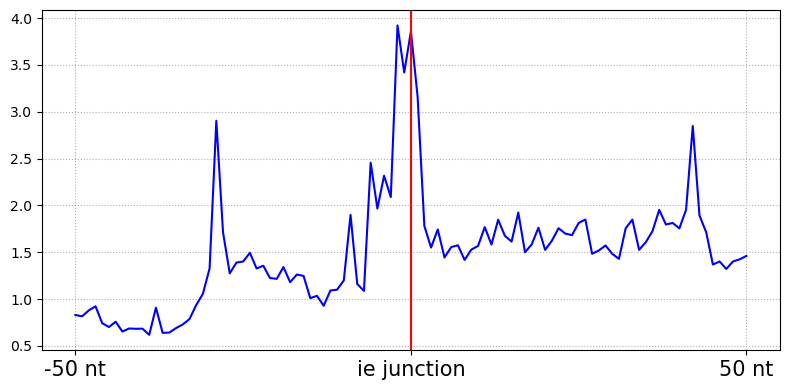

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(rpts.index, rpts / 10000, color = "blue")
plt.xlim(-55, 55)
plt.grid(True, linestyle=':')
plt.axvline(0, color = "red")
plt.xticks([-50, 0 , 50], ["-50 nt", "ie junction", "50 nt"], fontsize = 15)

plt.tight_layout()
plt.savefig('ie_junction.png')

plt.show()

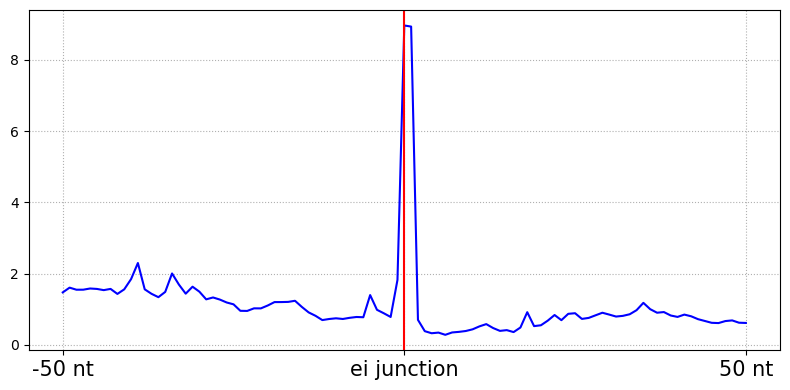

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(rpts.index, rpte / 10000, color = "blue")
plt.xlim(-55, 55)
plt.grid(True, linestyle=':')
plt.axvline(0, color = "red")
plt.xticks([-50, 0 , 50], ["-50 nt", "ei junction", "50 nt"], fontsize = 15)

plt.tight_layout()
plt.savefig('ei_junction.png')

plt.show()

In [ ]:
plt.xlabel("Relative position to start codon of 5'-end of reads")
plt.ylabel('siLuc\nRaw read count\n(x1000)')
plt.xlim(-50, 50)
plt.ylim(0, 60)
plt.grid(True, linestyle=':')
plt.axvline(0, color = "red")
plt.tight_layout()

plt.text(0, 65, "start codon", horizontalalignment = "center")